# Phishing Data Science Challenge

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

import matplotlib.colors as pltcolors
import seaborn as sns
import math
from itertools import product

In [2]:
training_df = pd.read_csv('Phising_Training_Dataset.csv')
testing_df = pd.read_csv('Phising_Testing_Dataset.csv')

In [3]:
training_df.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


# Exploratory Data Analysis

In [4]:
training_df.describe()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,...,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,16821.000000,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,...,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,2585.230164,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,...,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,12344.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,14582.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,16821.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,19059.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#remove the key from both training and test dataset
training_df = training_df.drop('key',axis=1)
testing_df = testing_df.drop('key',axis=1)

## Checking to see if there is any missing data in the dataset

In [6]:
# check if there is missing values
training_df.isna().sum()

having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

<Figure size 1440x1440 with 0 Axes>

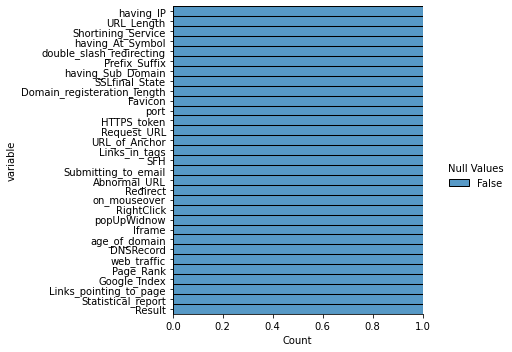

In [7]:
plt.figure(figsize=(20,20))
sns.displot(data=training_df.isna().melt(value_name="Null Values"),
            y="variable",
            hue="Null Values",
            multiple="fill",
            aspect=1.25
            )

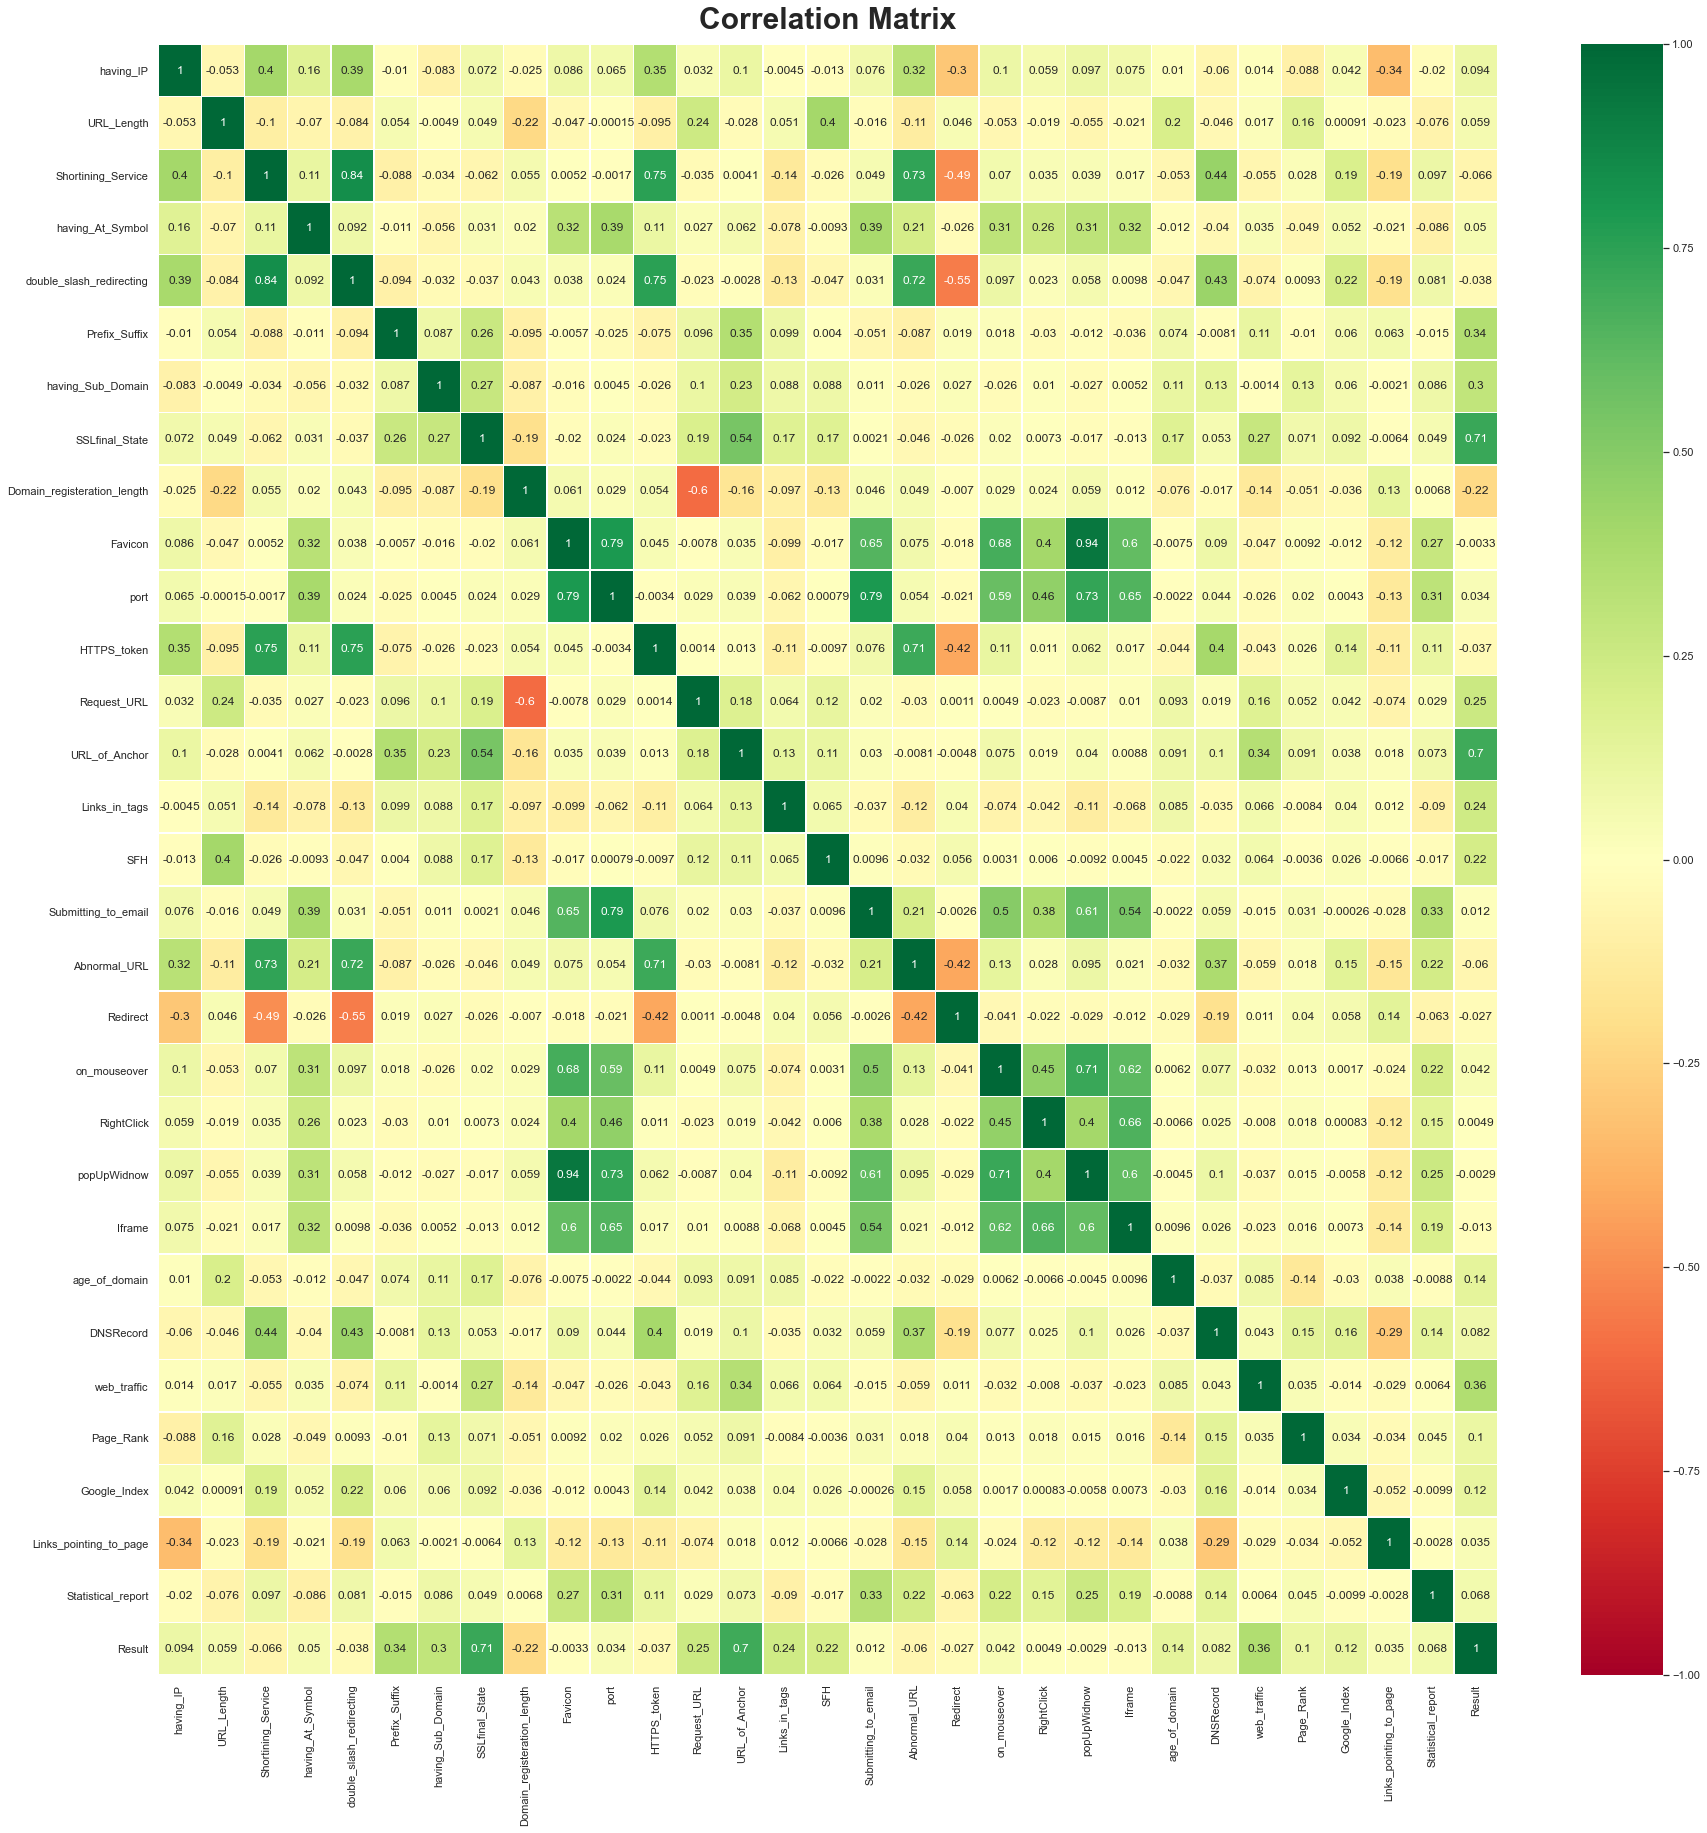

In [8]:
plt.figure(figsize=(30,30))
corr = training_df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
cor_plot = sns.heatmap(corr,
                       annot=True,
                       cmap='RdYlGn',
                       linewidths=.5, 
                       vmin=-1, 
                       vmax=1,)
plt.title('Correlation Matrix', 
          loc= 'center', 
          fontdict = {'fontsize' : 30, 
                      'fontweight' : 'bold'} , 
          pad= 15)
plt.show()

In [9]:
data = training_df.copy()

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

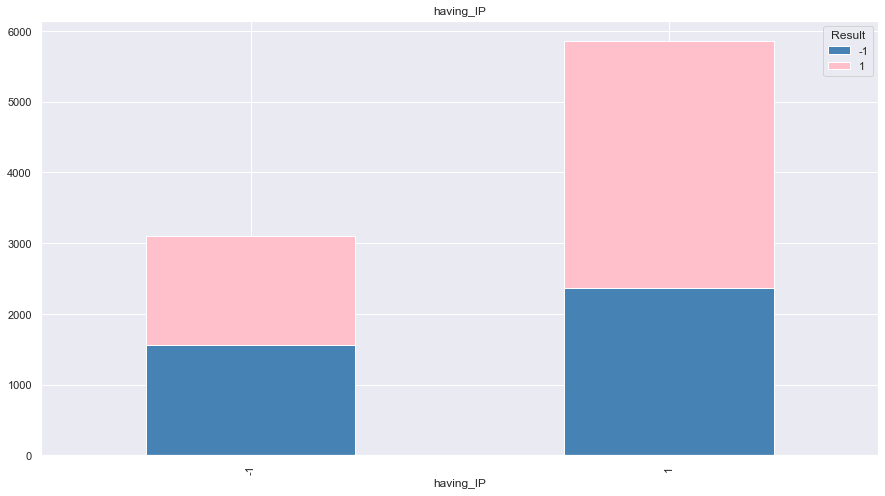

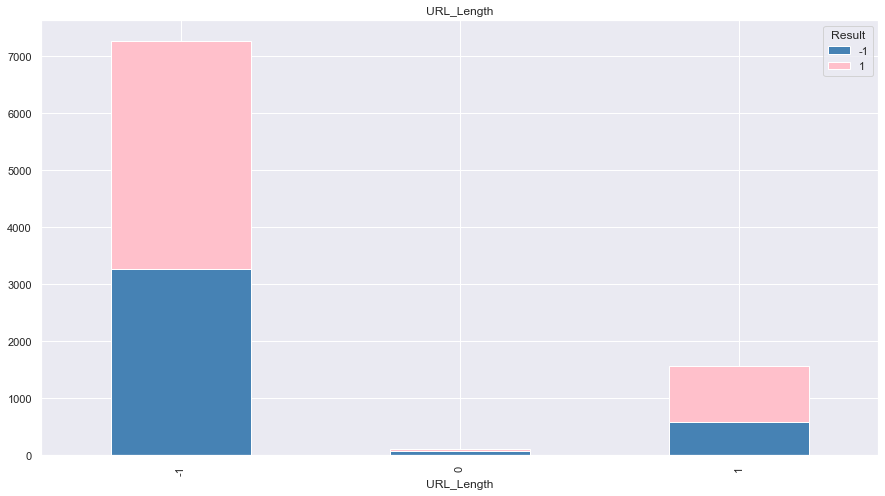

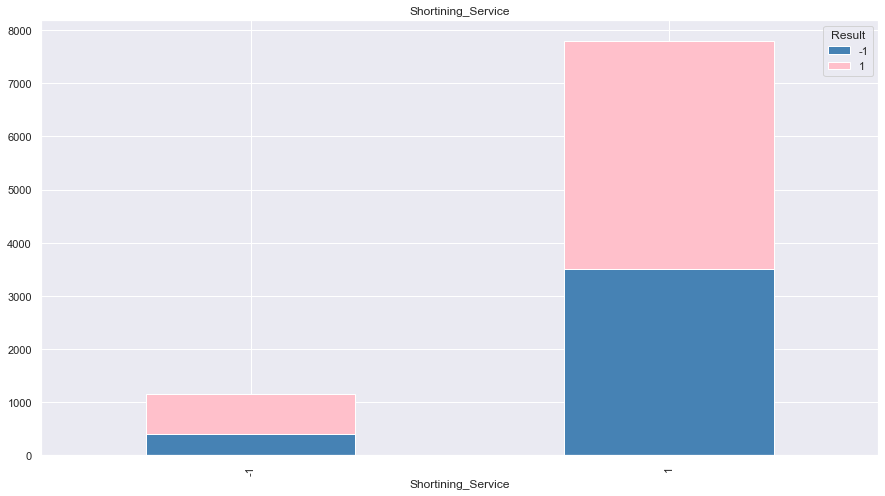

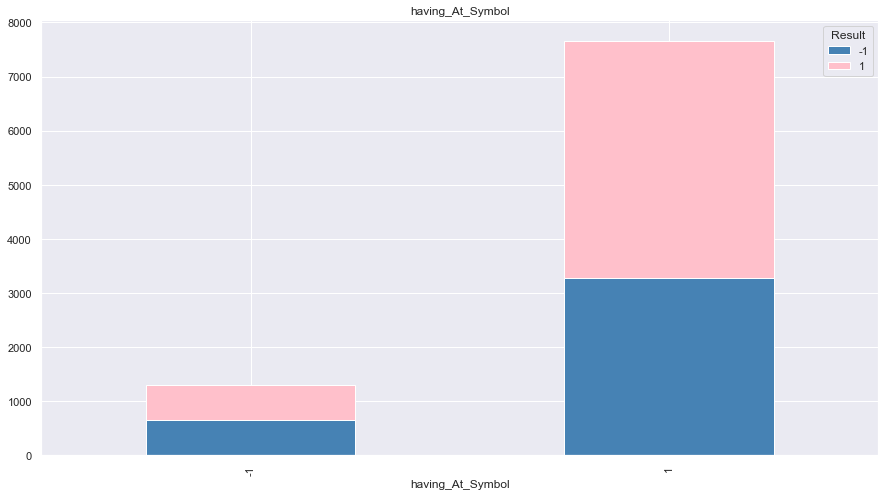

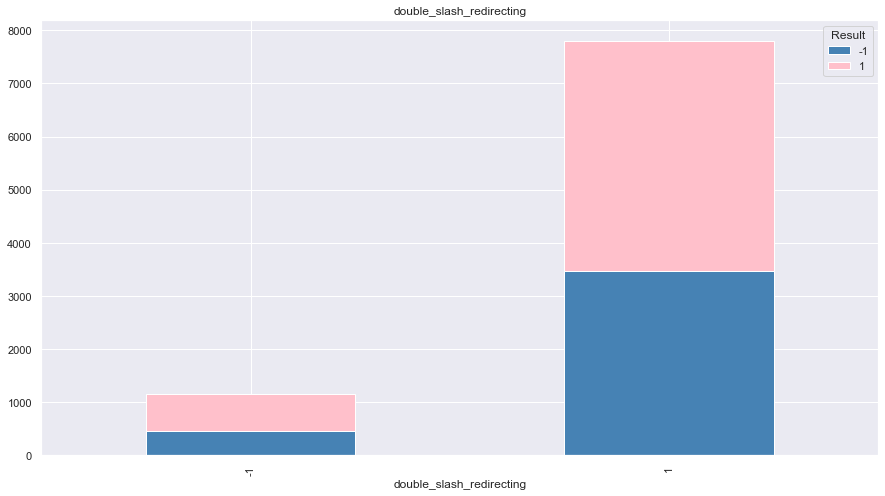

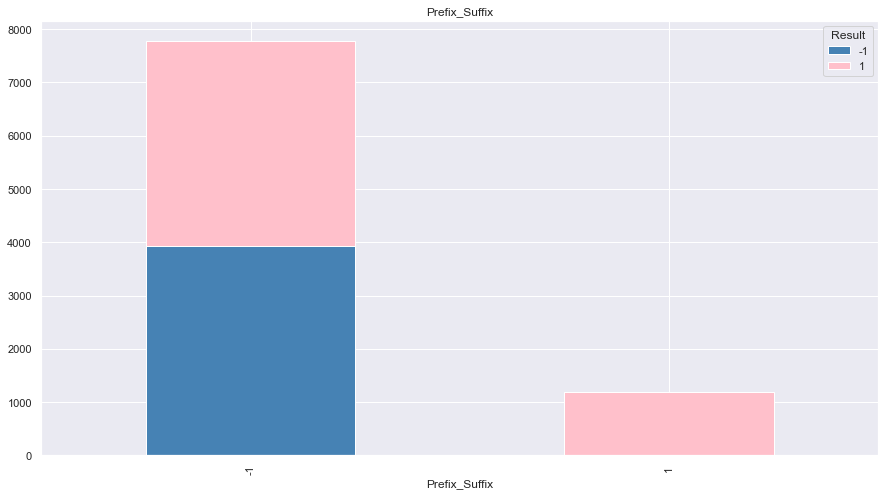

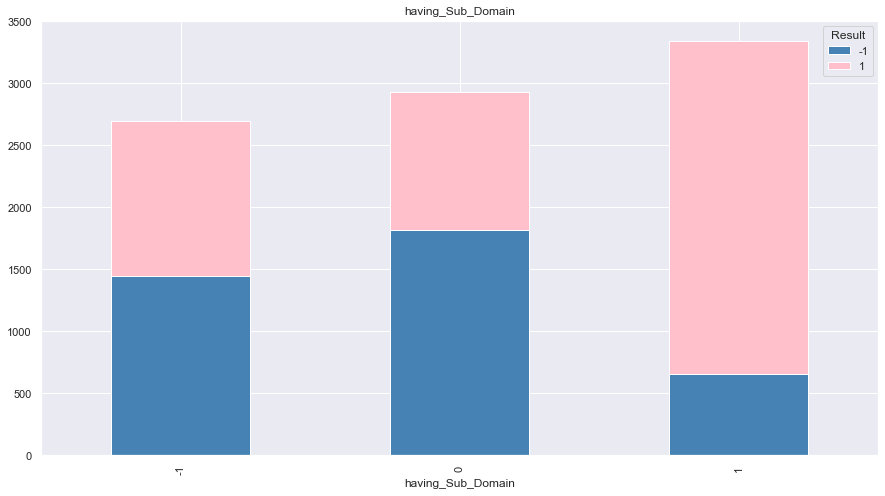

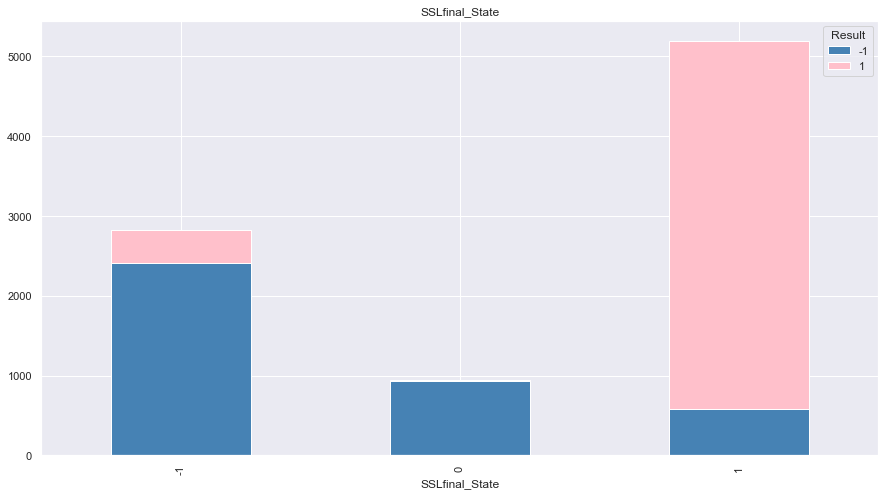

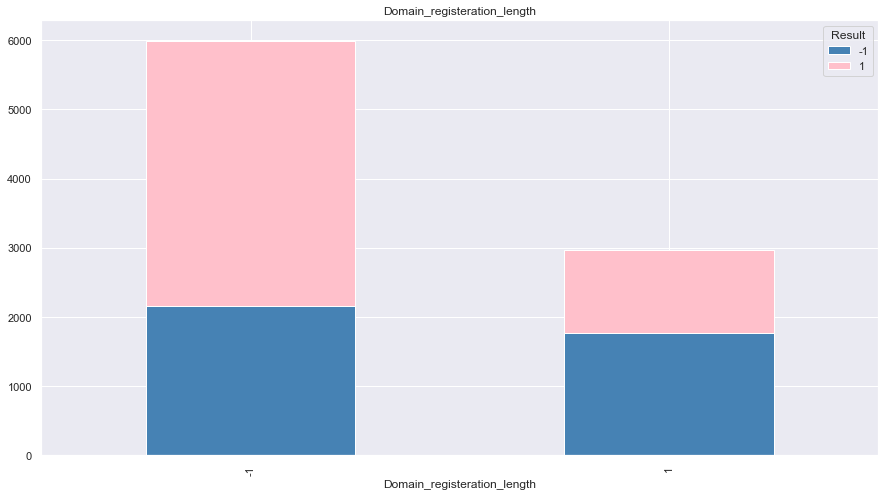

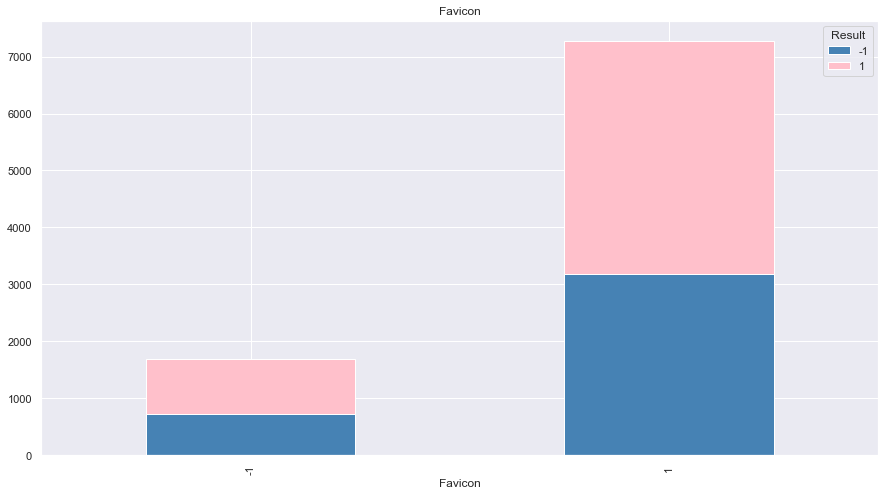

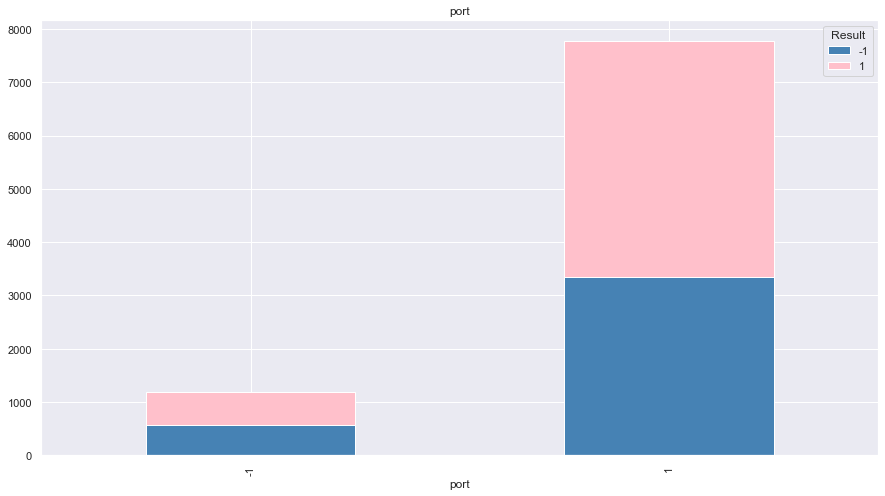

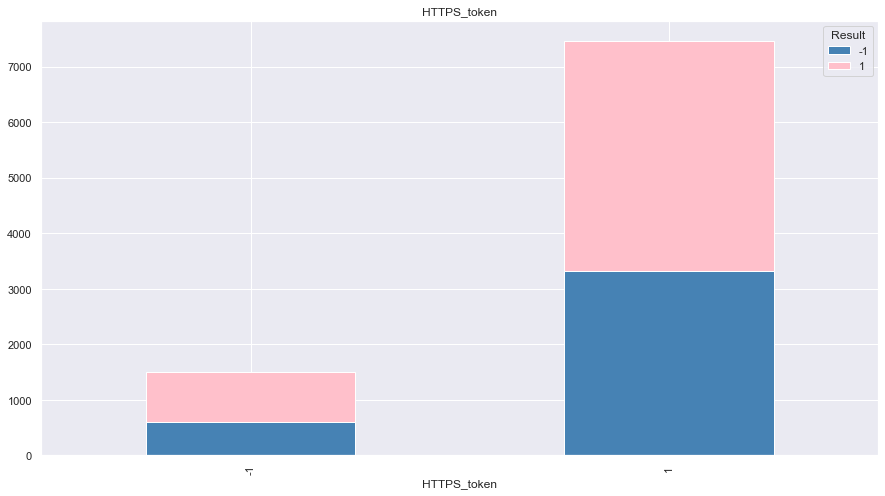

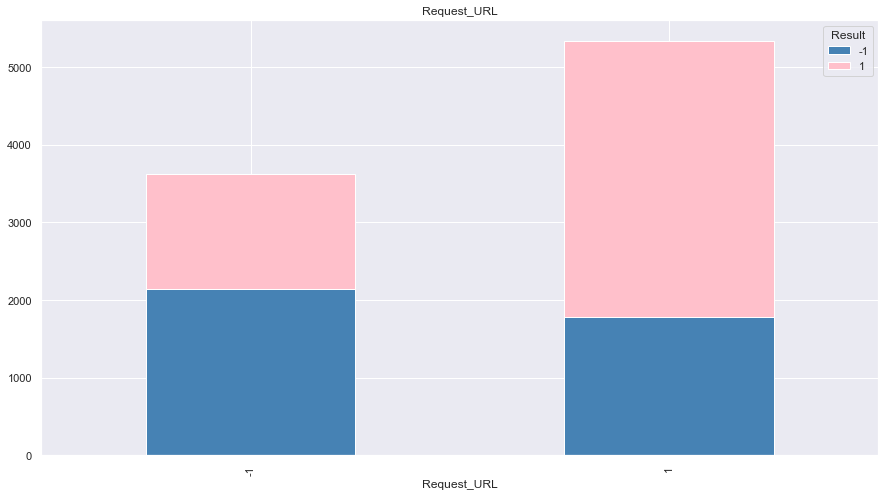

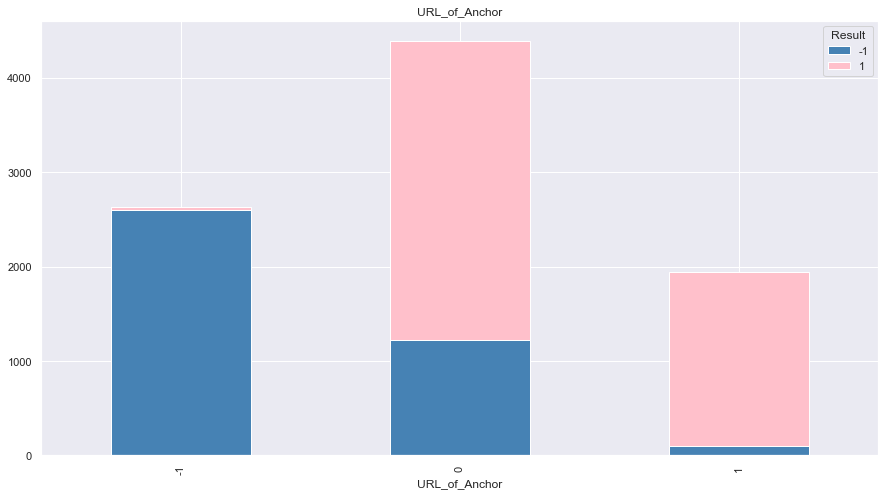

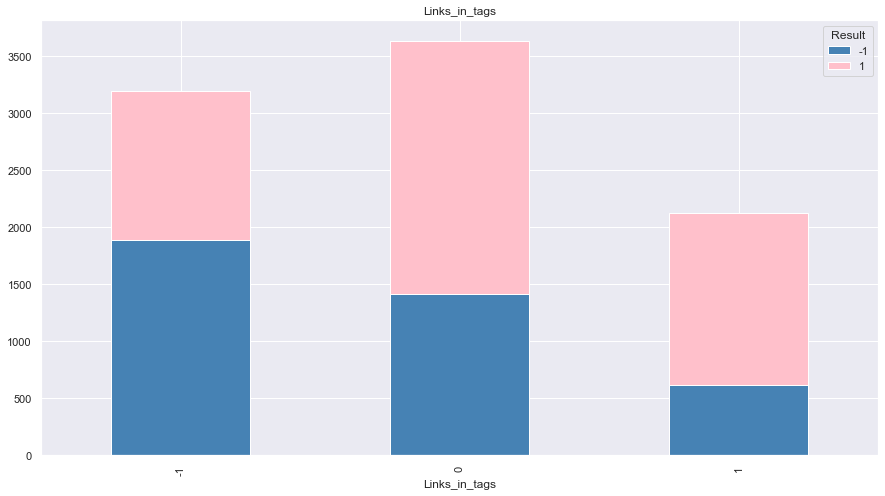

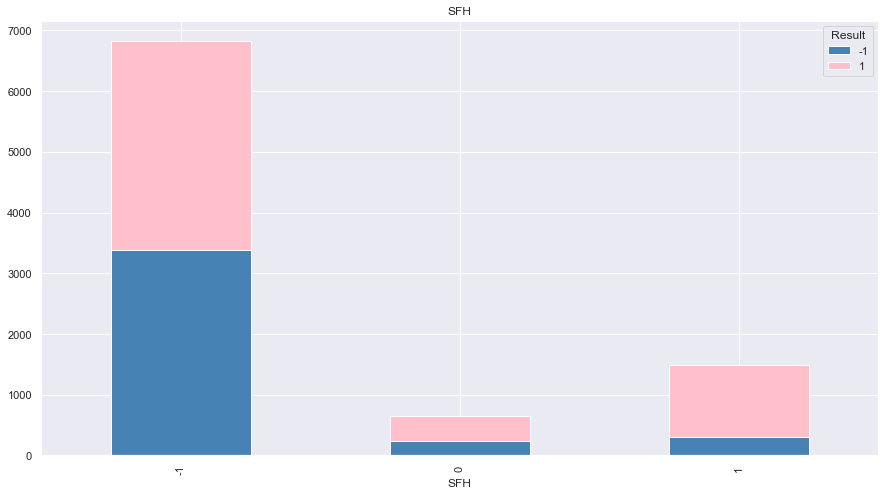

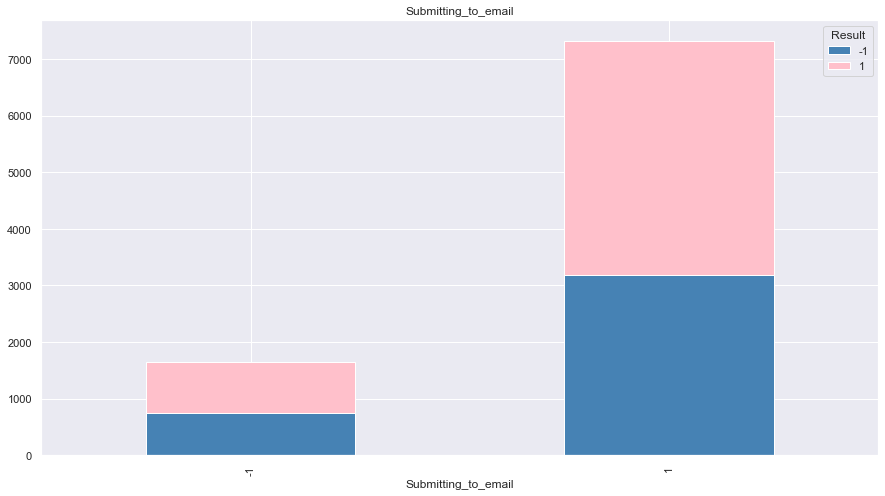

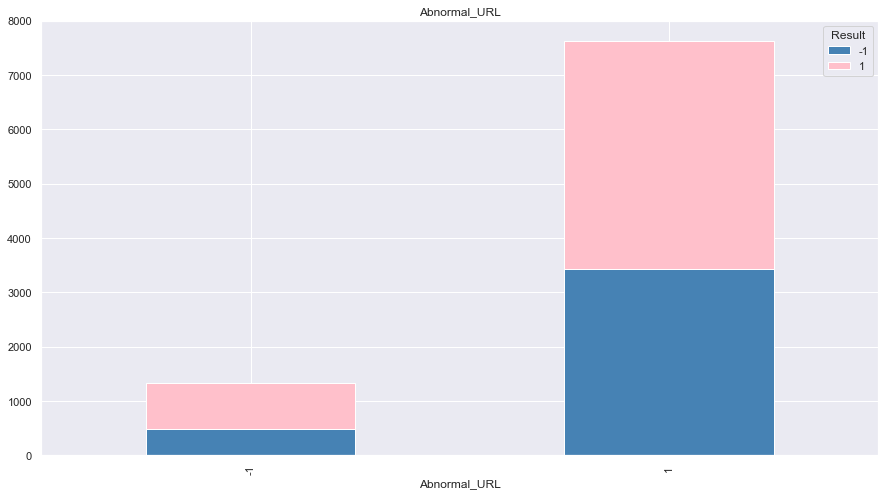

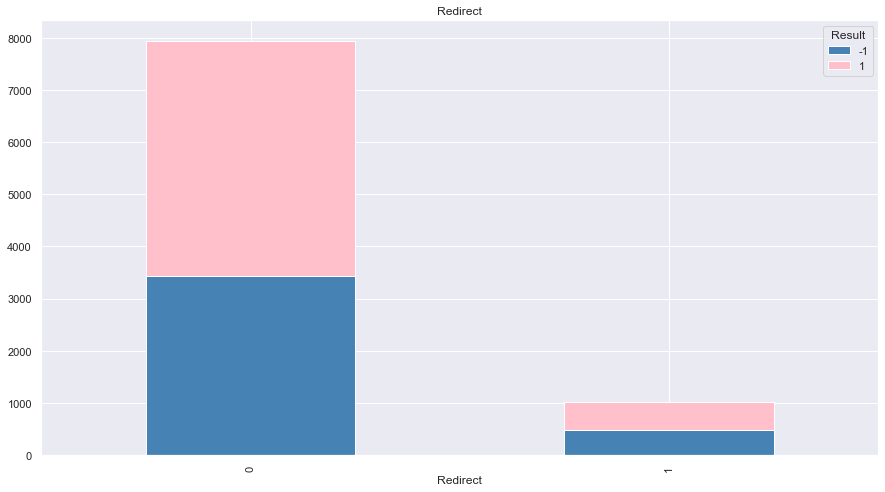

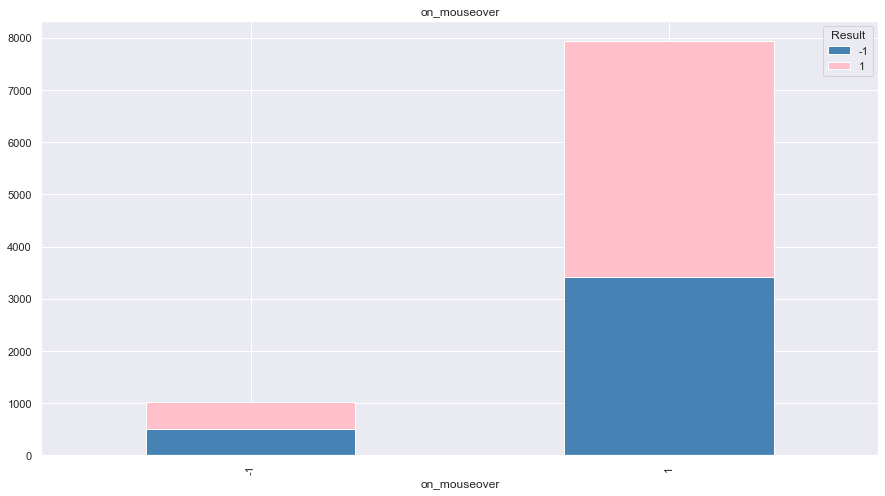

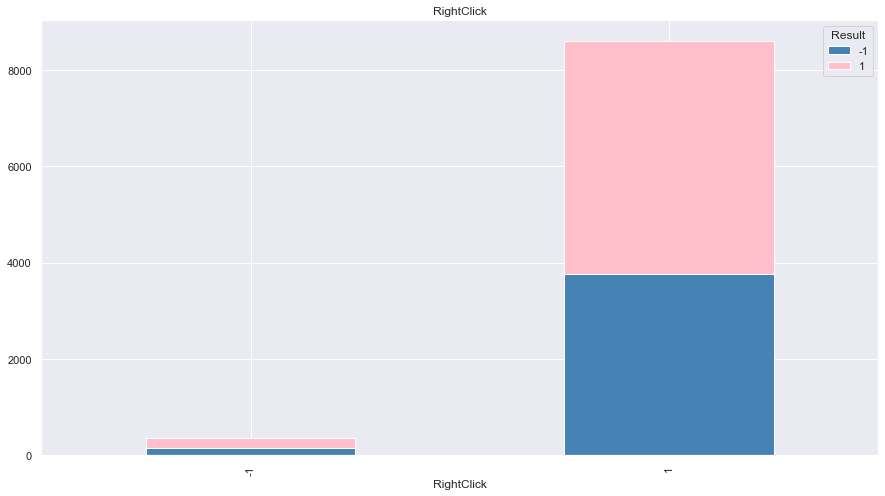

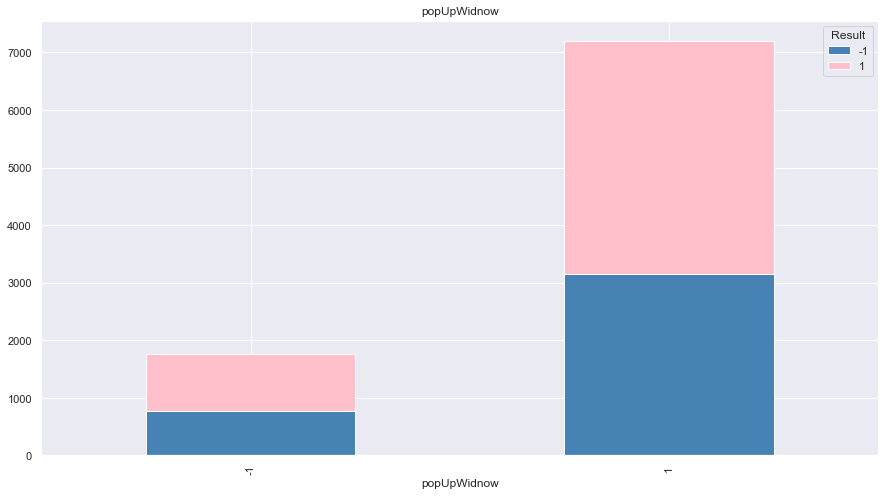

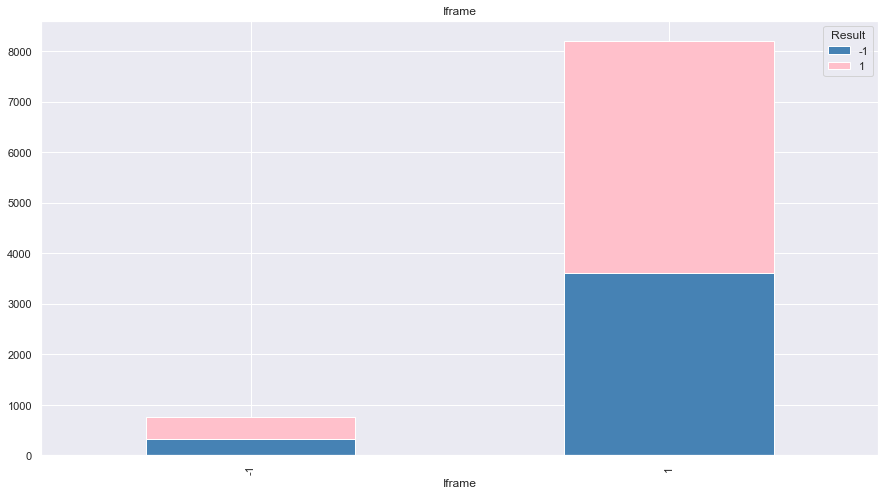

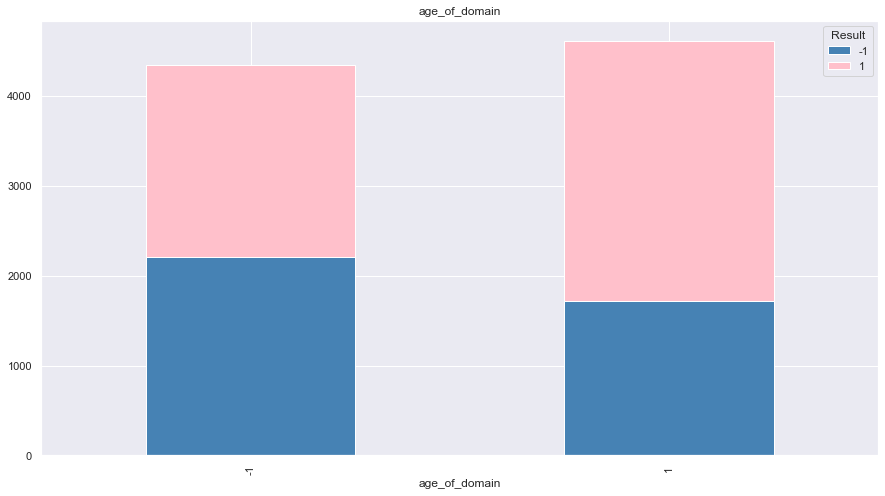

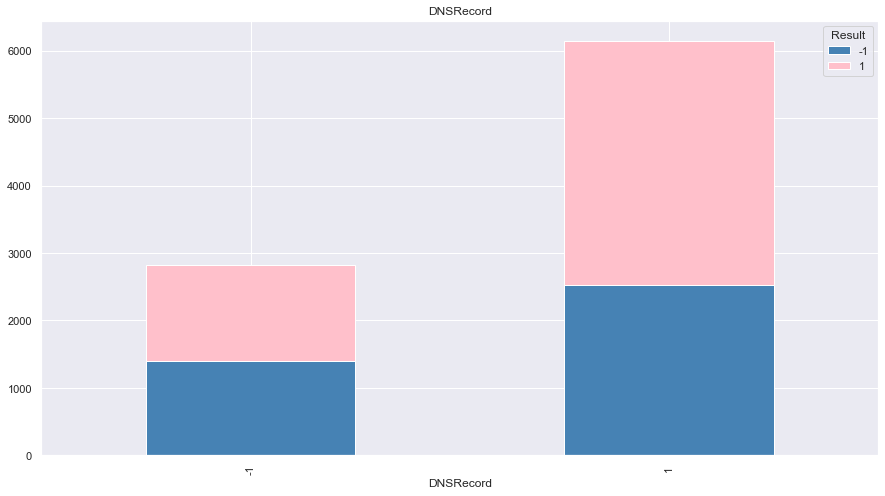

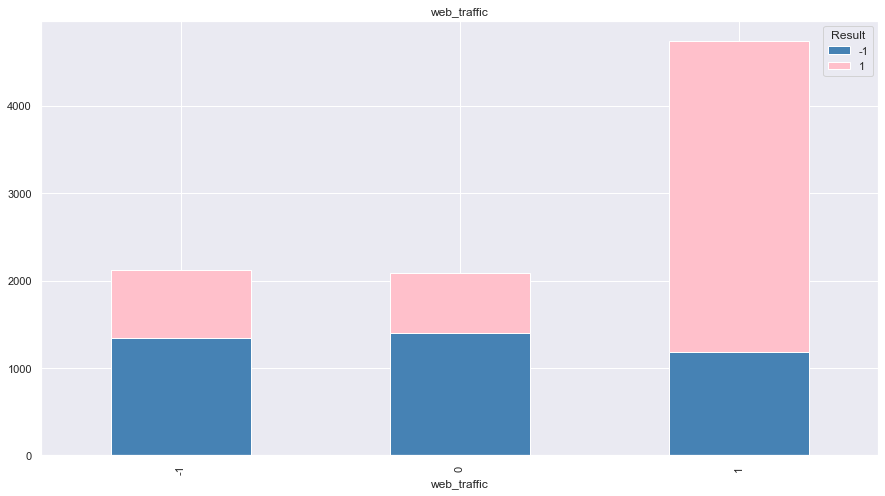

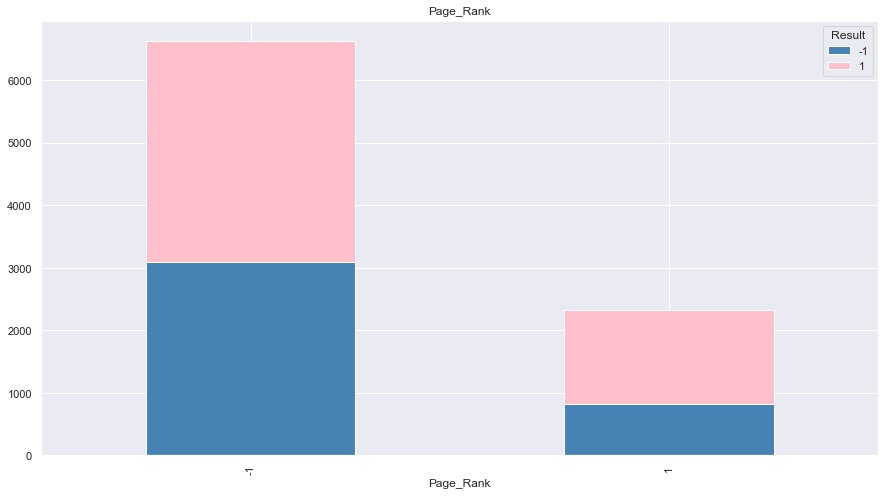

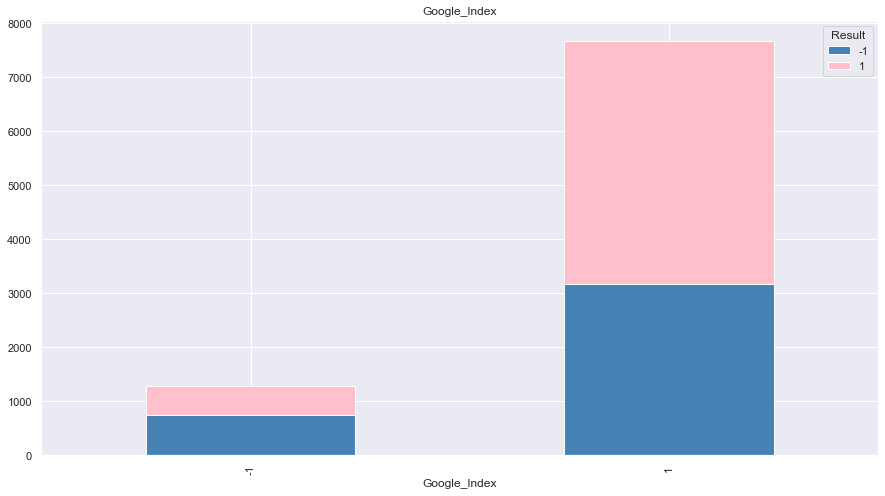

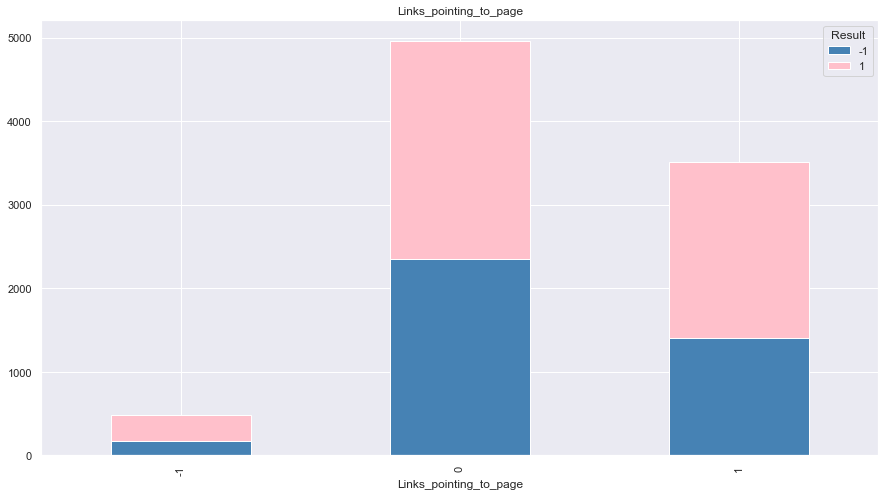

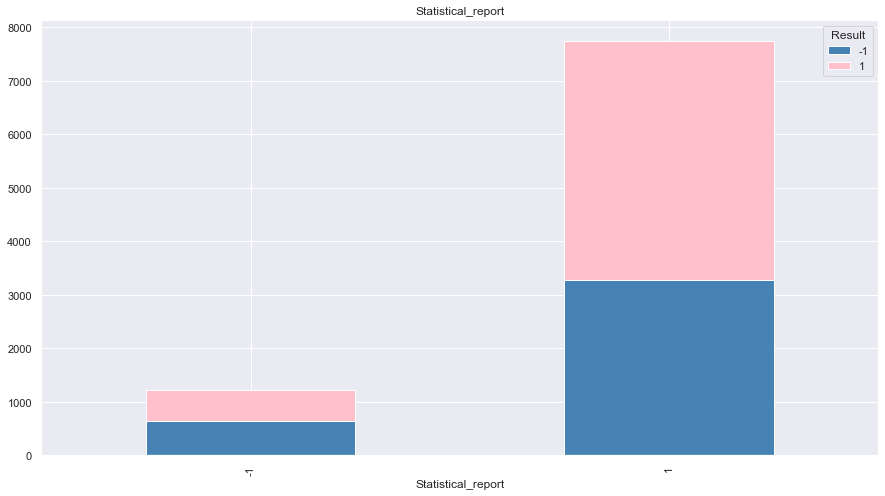

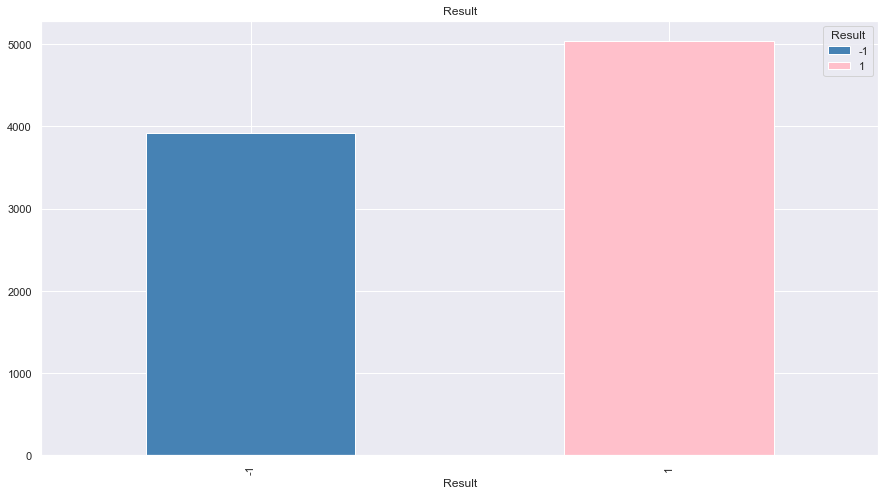

In [10]:
for cols in data.columns:
    pd.crosstab(data[cols],data['Result']).plot(kind = 'bar',stacked = True,color = ['steelblue','pink'])
    plt.title(cols)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<ipython-input-11-aefde07de311>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,4))
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-11-aefde07de311>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.fi

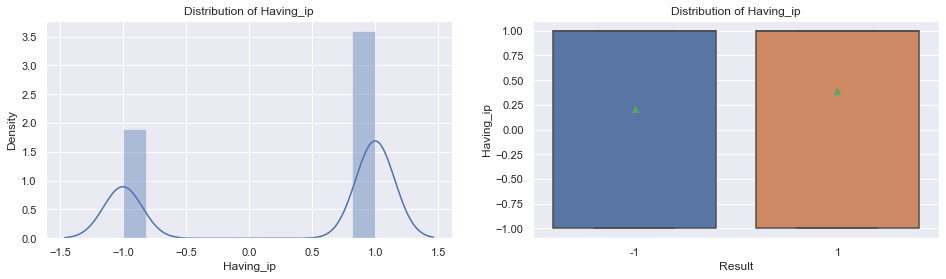

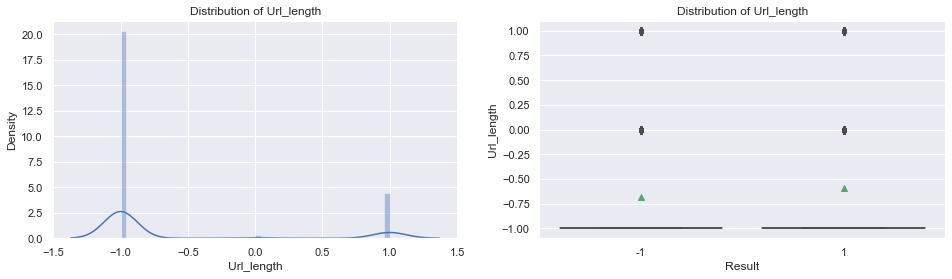

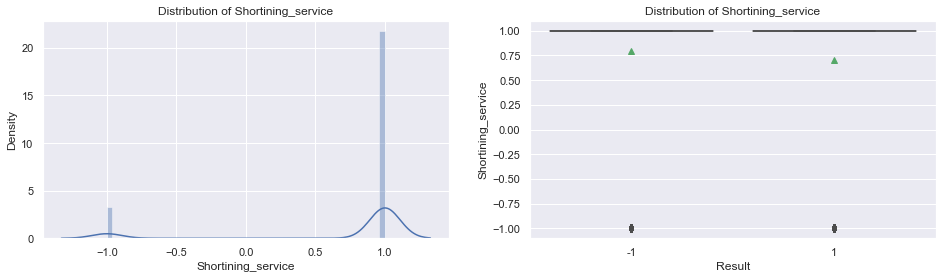

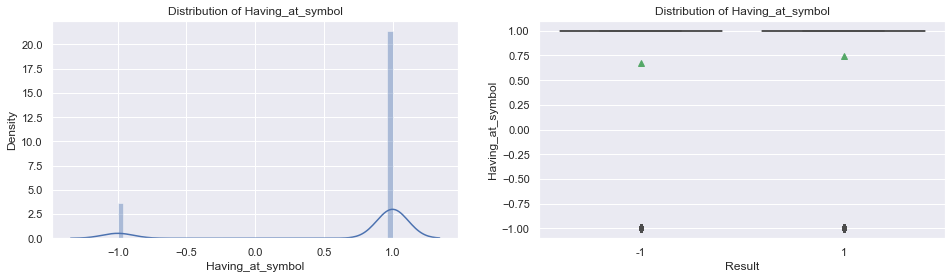

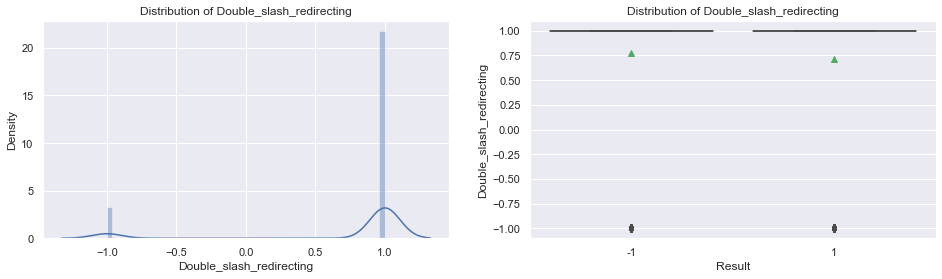

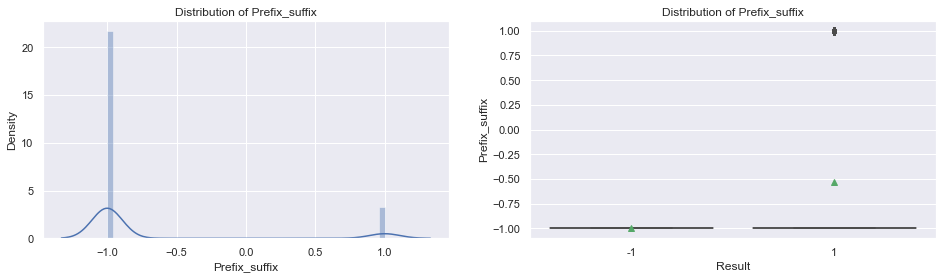

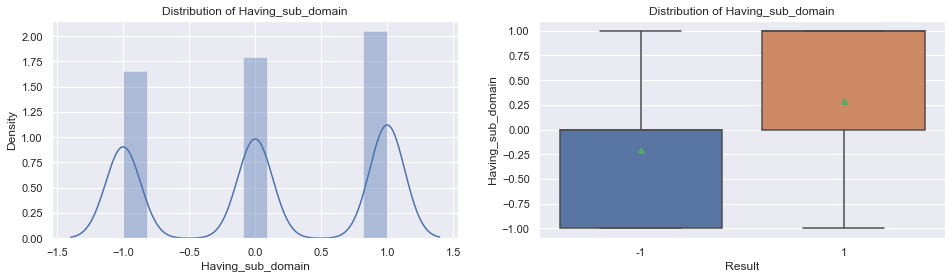

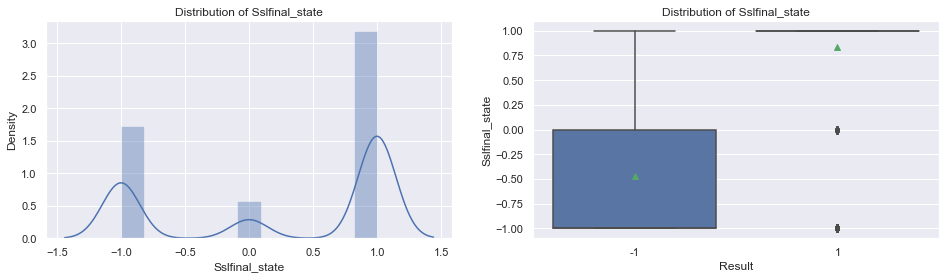

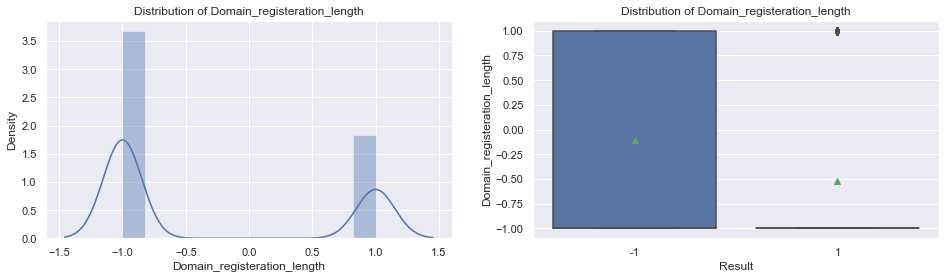

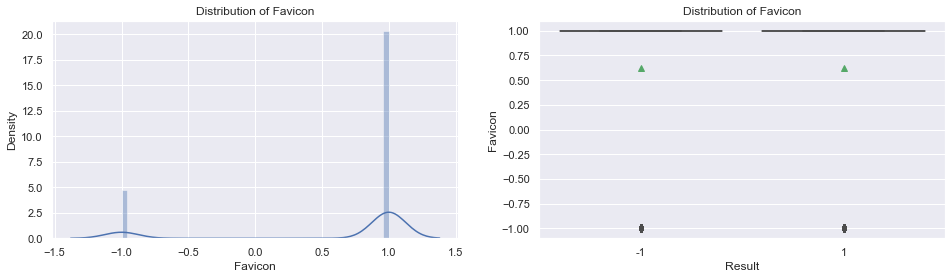

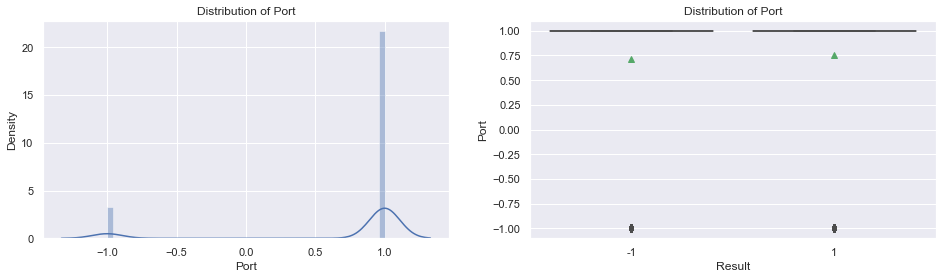

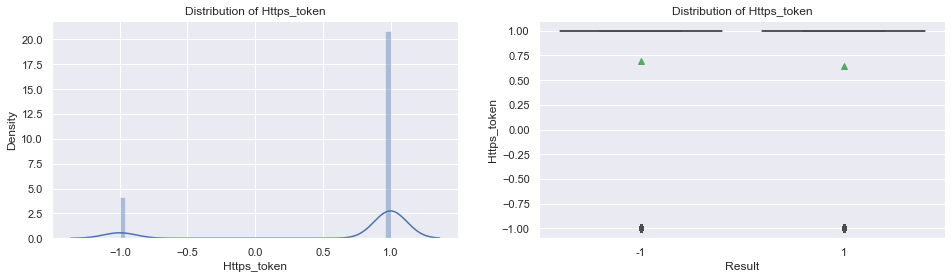

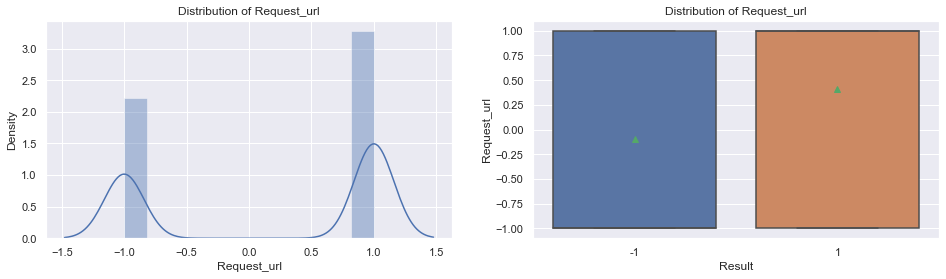

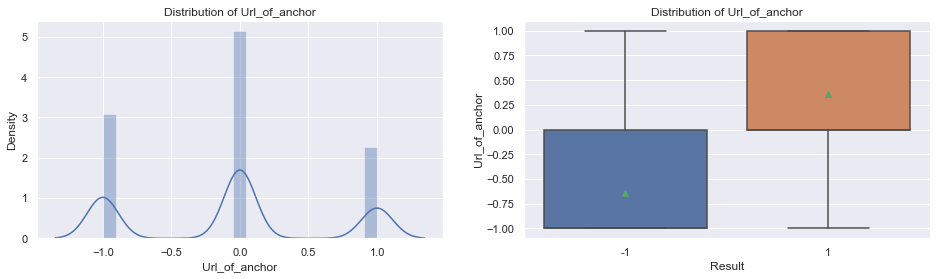

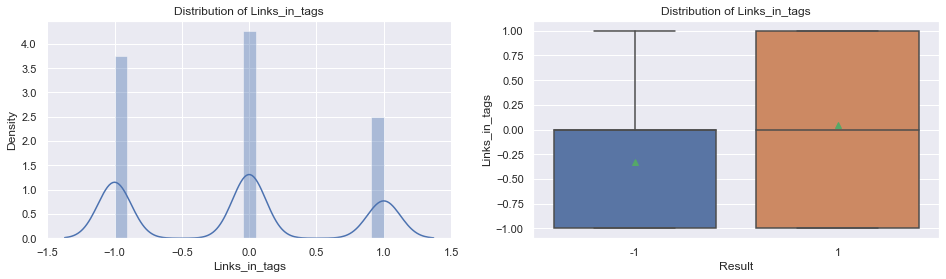

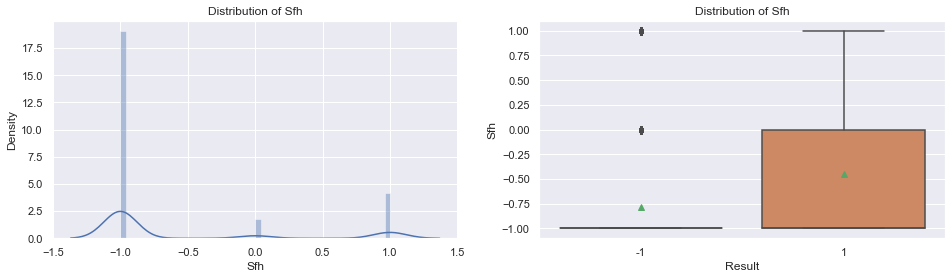

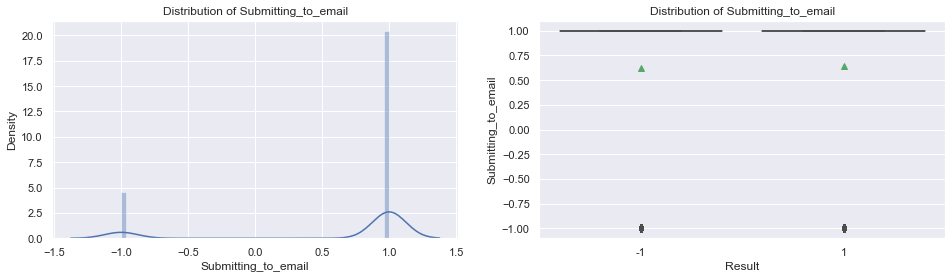

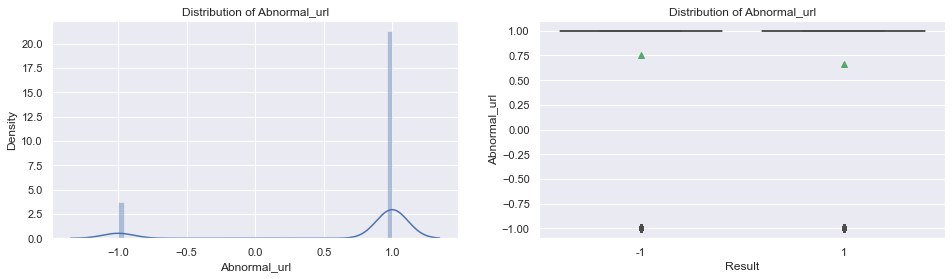

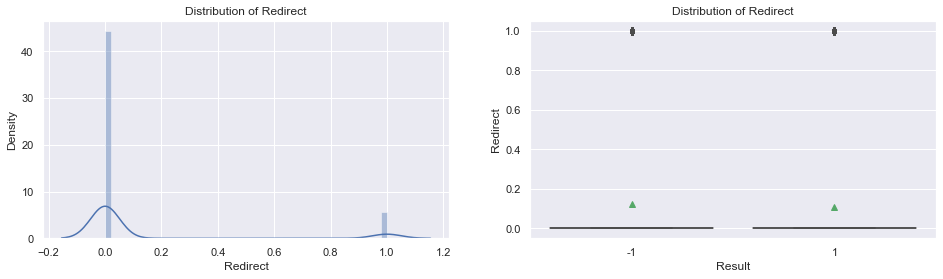

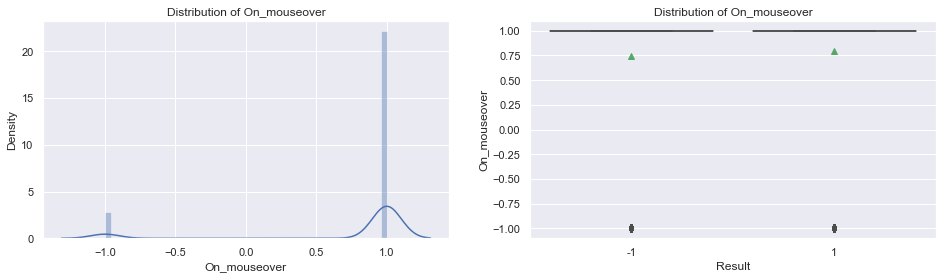

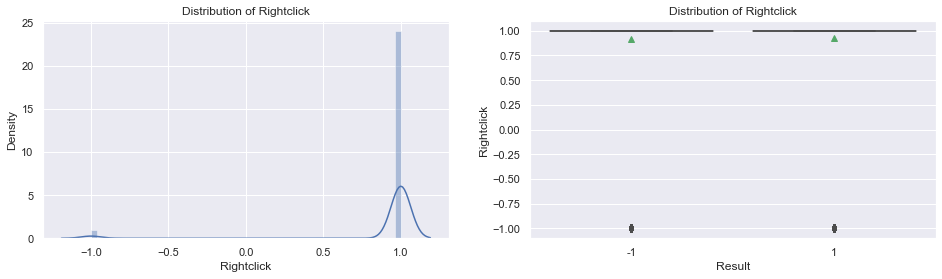

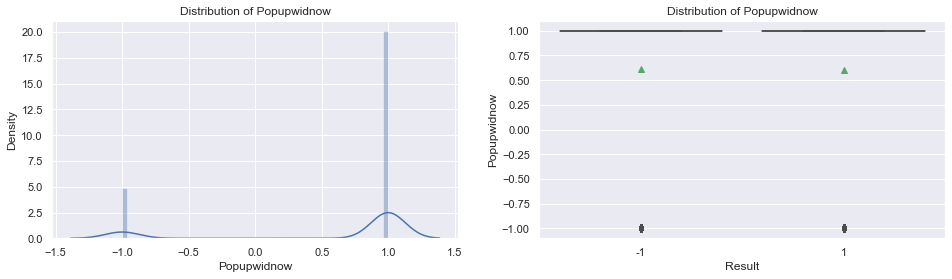

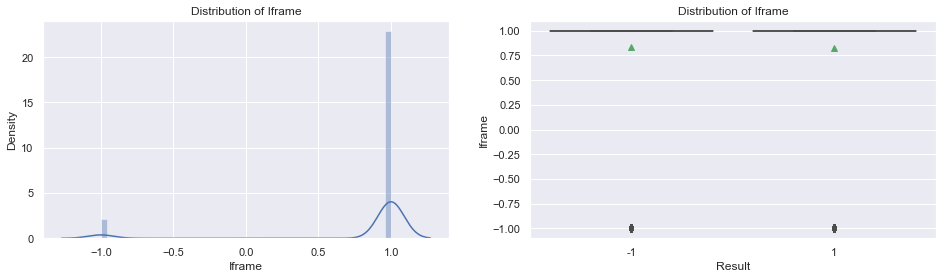

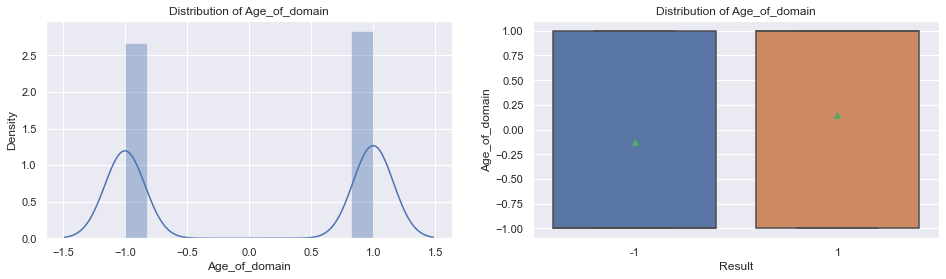

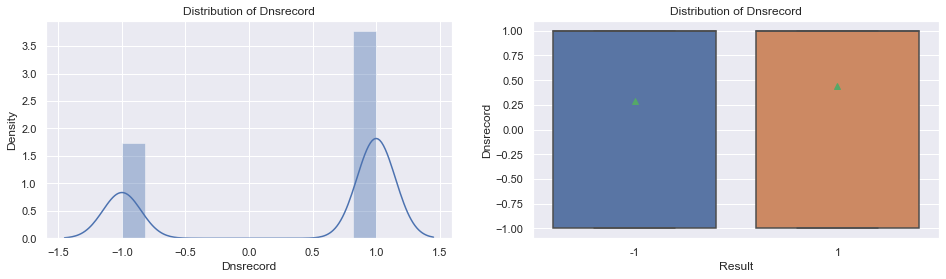

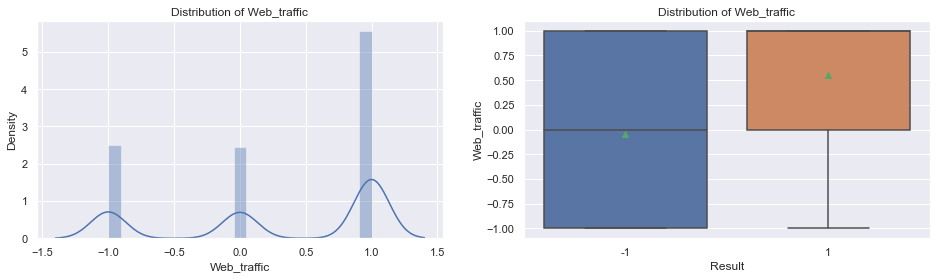

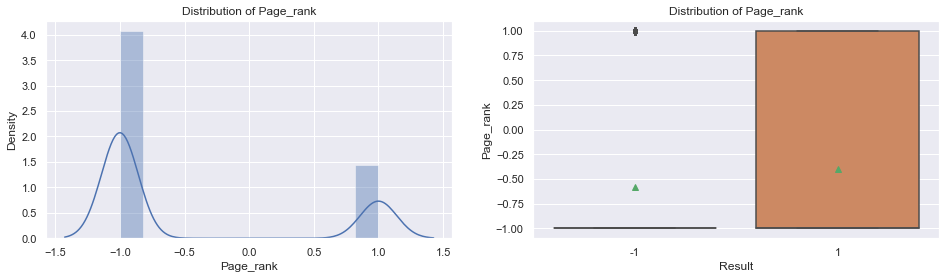

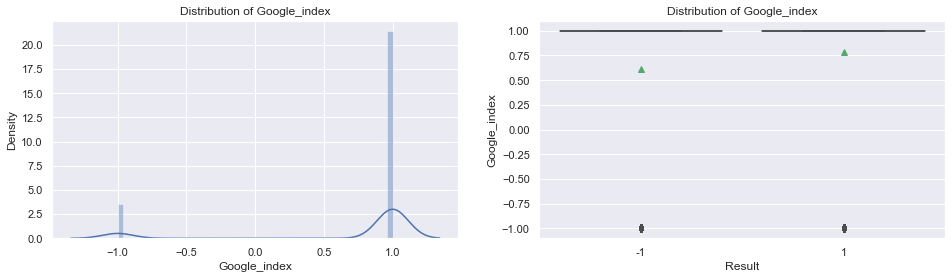

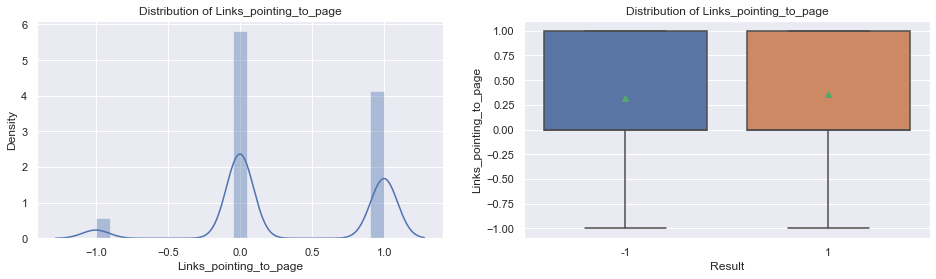

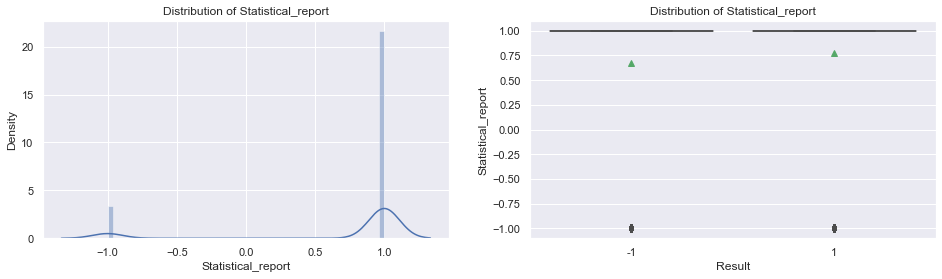

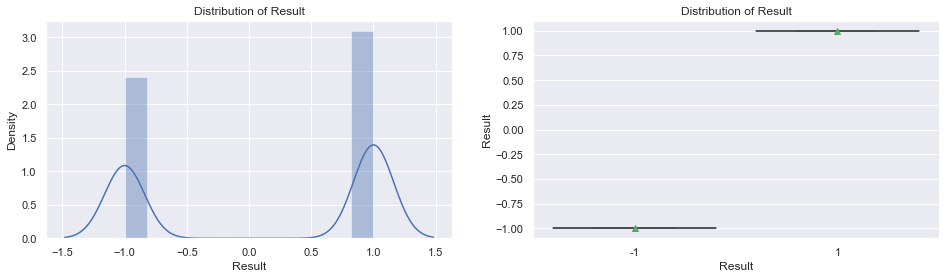

In [11]:
for column in data.columns:
    labelName = column.capitalize()
    plt.figure(figsize=(16,4))
 
    plt.subplot(1,2,1)
    sns.distplot(data[column])
    plt.xlabel(labelName)
    plt.ylabel('Density')
    plt.title(f'Distribution of {labelName}')
 
    plt.subplot(1,2,2)
    sns.boxplot(x = 'Result', y = column, data = data, showmeans = True)
    plt.xlabel('Result')
    plt.ylabel(labelName)
    plt.title(f'Distribution of {labelName}')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

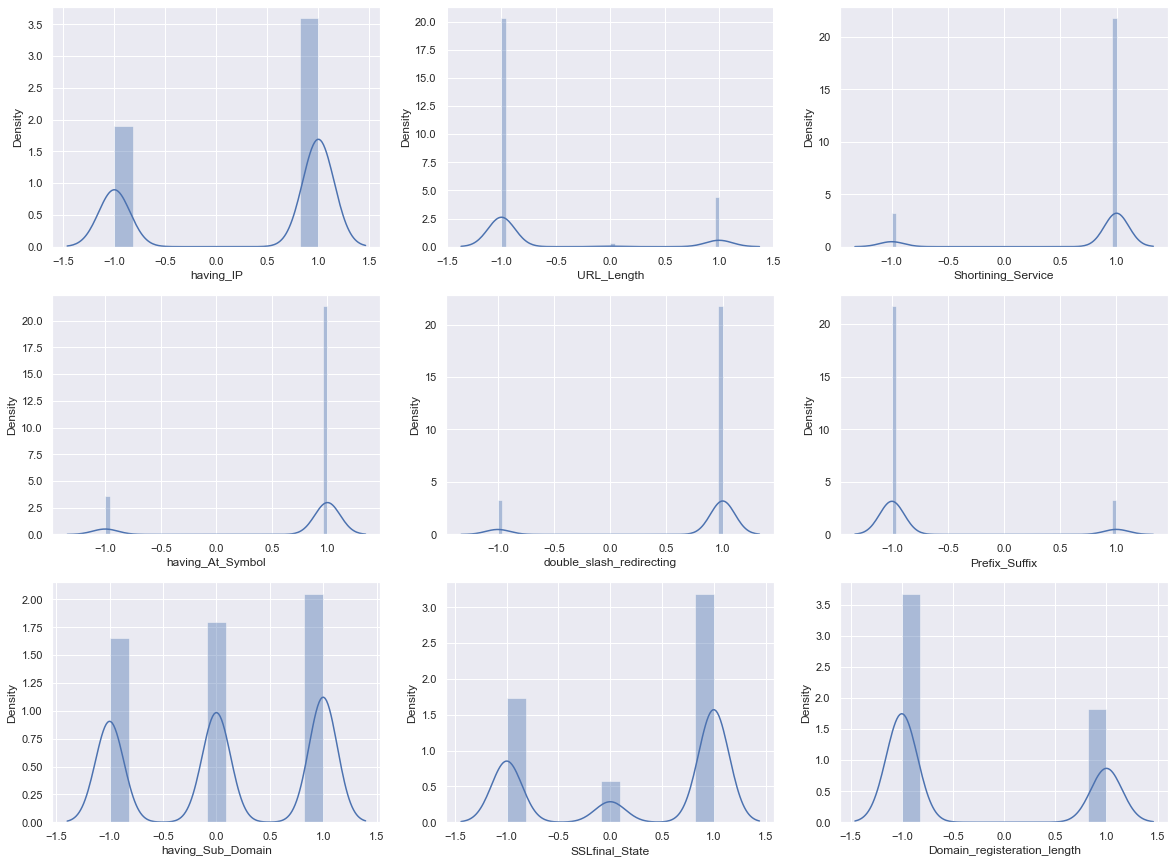

In [12]:
sns.set(rc = {'figure.figsize':(20,15)})
f, axes = plt.subplots(3,3)
index = 0

for i, j in product(range(0,3), range(0,3)):
    chart = sns.distplot(data[data.columns[index]],ax = axes[i][j])
    index += 1

## Remove outliers 

In [13]:
def remove_outliers(data, columnName):
    Q1 = np.percentile(data[columnName], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data[columnName], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    data = data[(data[columnName] <= (Q3 + 1.5 * IQR)) & (data[columnName] >= (Q1 - 1.5 * IQR))]
    data.reset_index(drop = True, inplace = True)
    
    return data

In [14]:
outlier_columns = ['double_slash_redirecting','Prefix_Suffix','Favicon','port','HTTPS_token','having_At_Symbol',
                   'Abnormal_URL','Submitting_to_email','RightClick','Redirect','on_mouseover','Iframe','Google_Index',
                   'Google_Index','Statistical_report','popUpWidnow','Shortining_Service','URL_Length']
for column in outlier_columns:
    data = remove_outliers(data, column)


<ipython-input-13-c756c1ffb419>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data[columnName], 25, interpolation = 'midpoint')
<ipython-input-13-c756c1ffb419>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data[columnName], 75, interpolation = 'midpoint')
<ipython-input-13-c756c1ffb419>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 =

# Model building

In [15]:
from sklearn.model_selection import train_test_split
 
training_df_X, testing_df_X,training_df_y, testing_df_y = train_test_split(
              training_df.iloc[:,0:-1],training_df.iloc[:,-1],test_size = 0.20, stratify=training_df['Result'],  random_state = 101)





# Feature Extraction- Princpal Component Analysis

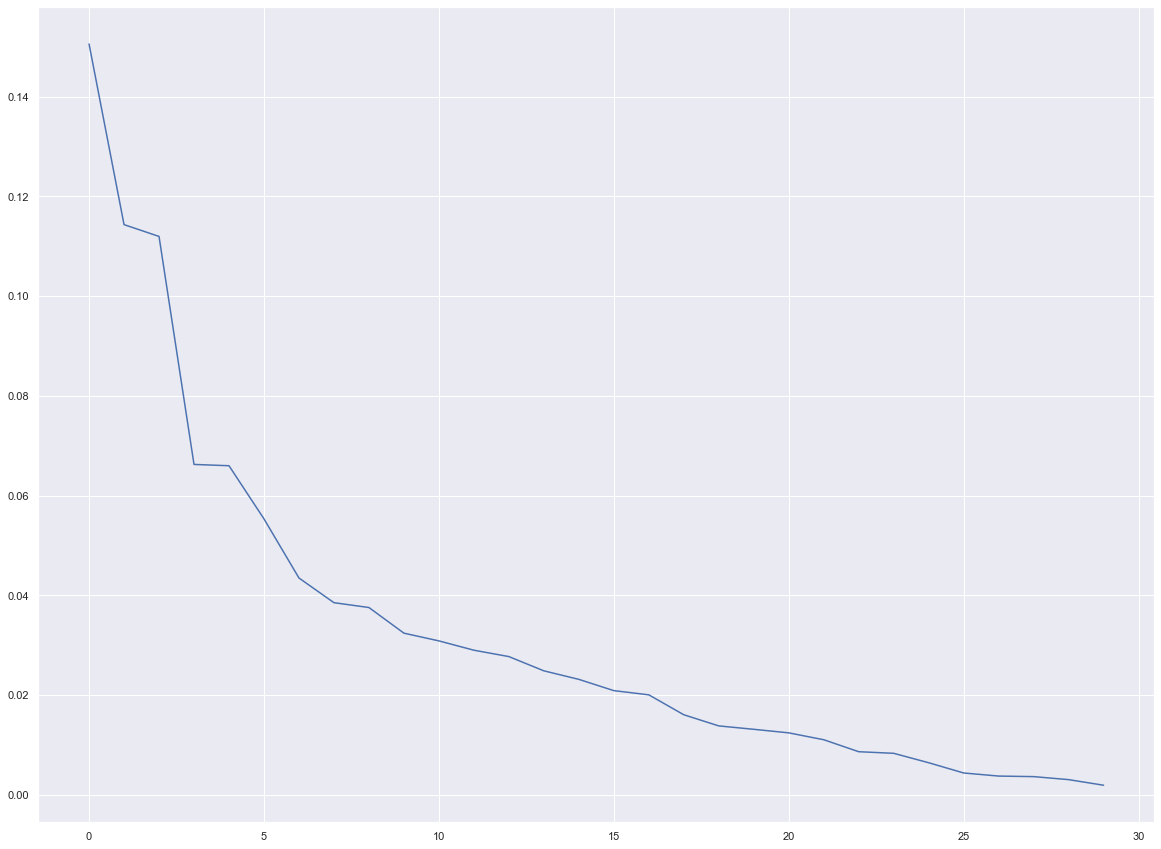

In [16]:
#feature engineering
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(training_df_X)
plt.plot(pca.explained_variance_ratio_)
pca = PCA(n_components=25)
training_df_X = pca.fit_transform(training_df_X)
testing_df_X =pca.transform(testing_df_X)
testing_df =pca.transform(testing_df)

In [17]:
model = SVC()
model.fit(training_df_X, training_df_y)
predictions = model.predict(training_df_X)
print(classification_report(training_df_y, predictions))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      3137
           1       0.95      0.97      0.96      4027

    accuracy                           0.96      7164
   macro avg       0.96      0.96      0.96      7164
weighted avg       0.96      0.96      0.96      7164



In [18]:
#grid search cv
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(training_df_X, training_df_y)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   1.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.573 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.576 total time=   1.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   1.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   1.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.928 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.931 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.925 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.876 total time=   1.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.874 total time=   1.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.863 total time=   1.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.884 total time=   1.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.948 total time=   0.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.959 total time=   0.5s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.5s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.960 total time=   0.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.954 total time=   0.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.960 total time=   0.7s
[CV 4/5] END ....C=1000, gam

## Evaluation Metric - Training Dataset(splited)

In [19]:
def change_value(column):
    lst = []
    for i in column:
        if i ==1:
            lst.append('Legitimate')
        else:
            lst.append('Phishing')
    return lst

In [20]:
grid_predictions = grid.predict(training_df_X)
#training Confusion Matrix
prediction_lst = change_value(grid_predictions)
training_df_y_lst = change_value(training_df_y)
confustion_matrix = pd.DataFrame(confusion_matrix(training_df_y_lst,prediction_lst),columns=['Legimate','Phishing'])
confustion_matrix['Result'] = ['Legitimate','Phishing']
confustion_matrix.set_index(['Result']).reset_index()


,Result,Legimate,Phishing
0,Legitimate,4001,26
1,Phishing,77,3060


In [21]:
training_df_y_lst[training_df_y_lst=='Legitimate']

'Phishing'

In [22]:
# print classification report
print("Training Dataset Report")
pd.DataFrame(confusion_matrix(training_df_y,grid_predictions))
print(classification_report(training_df_y, grid_predictions))

Training Dataset Report
              precision    recall  f1-score   support

          -1       0.99      0.98      0.98      3137
           1       0.98      0.99      0.99      4027

    accuracy                           0.99      7164
   macro avg       0.99      0.98      0.99      7164
weighted avg       0.99      0.99      0.99      7164



## Evaluation Metric - Testing Dataset(splited)

In [23]:
#with the testing splitted dataset
grid_predictions = grid.predict(testing_df_X)
#training Confusion Matrix
prediction_lst = change_value(grid_predictions)
testing_df_y_lst = change_value(testing_df_y)
confustion_matrix = pd.DataFrame(confusion_matrix(testing_df_y_lst,prediction_lst),columns=['Legimate','Phishing'])
confustion_matrix['Result'] = ['Legitimate','Phishing']
confustion_matrix.set_index(['Result']).reset_index()


,Result,Legimate,Phishing
0,Legitimate,980,27
1,Phishing,46,738


In [24]:
# print classification report
print("Testing Dataset Report")
print(classification_report(testing_df_y, grid_predictions))

Testing Dataset Report
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       784
           1       0.96      0.97      0.96      1007

    accuracy                           0.96      1791
   macro avg       0.96      0.96      0.96      1791
weighted avg       0.96      0.96      0.96      1791



# Prediction of Test Unseen Dataset 

In [25]:
# move with the test dataset
grid_predictions = grid.predict(testing_df)

new_column_names = ['Legitimate/Phishing']
pd.DataFrame(grid_predictions).to_csv('prediction_results.csv', index=False, header=new_column_names)